<h2 style="text-align: center">LOS<h2>

In [2]:
import pandas as pd

df = pd.read_csv('LOS.csv')
df = df.drop(columns=['Data URI'])
df.head()


,Time,Content
0,2025-03-09T08:58:48.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
1,2025-03-09T08:59:00.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
2,2025-03-09T08:59:10.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
3,2025-03-09T08:59:18.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."
4,2025-03-09T08:59:30.000Z,"{""devUI"":""08:D1:F9:35:B5:48"",""time_at_device"":..."


In [3]:
import json

def clean_json(text):
    try:
        return json.loads(text.replace("\n", "").replace("\r", "").strip())  # Hapus karakter newline dan spasi ekstra
    except json.JSONDecodeError:
        return None  # Jika gagal, isi dengan None

df["Content"] = df["Content"].apply(clean_json)
df = df.dropna(subset=["Content"])

# Ekstrak data JSON menjadi kolom sendiri
df_json = df["Content"].apply(pd.Series)
df = pd.concat([df.drop(columns=["Content"]), df_json], axis=1)

df.head()


,Time,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor,packet_id
0,2025-03-09T08:58:48.000Z,08:D1:F9:35:B5:48,2025-03-09 08:58:32,2025-03-09 08:58:47,2025-03-09 08:58:47.872,-108,http,231.20,0.09,7.30,0.78,433000000.0,0.36,NaN
1,2025-03-09T08:59:00.000Z,08:D1:F9:35:B5:48,2025-03-09 08:58:42,2025-03-09 08:58:57,2025-03-09 08:58:57.224,-107,http,231.60,0.09,7.20,0.78,433000000.0,0.35,NaN
2,2025-03-09T08:59:10.000Z,08:D1:F9:35:B5:48,2025-03-09 08:58:53,2025-03-09 08:59:07,2025-03-09 08:59:07.592,-108,http,231.30,0.09,7.50,0.78,433000000.0,0.36,NaN
3,2025-03-09T08:59:18.000Z,08:D1:F9:35:B5:48,2025-03-09 08:59:03,2025-03-09 08:59:18,2025-03-09 08:59:18.967,-108,mqtt,230.90,0.09,7.20,0.78,433000000.0,0.35,NaN
4,2025-03-09T08:59:30.000Z,08:D1:F9:35:B5:48,2025-03-09 08:59:13,2025-03-09 08:59:28,2025-03-09 08:59:28.330,-108,mqtt,231.70,0.09,7.10,0.78,433000000.0,0.35,NaN


In [4]:
# Ubah kolom "Time" menjadi format datetime
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# Tambahkan 1 detik ke semua baris
df["Time"] = df["Time"] + pd.Timedelta(seconds=1)

# Ubah kembali ke format string jika diperlukan
df["Time"] = df["Time"].dt.strftime("%Y-%m-%d %H:%M:%S")
df = df.rename(columns={"Time": "received_at_server"})

df.head()

,received_at_server,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor,packet_id
0,2025-03-09 08:58:49,08:D1:F9:35:B5:48,2025-03-09 08:58:32,2025-03-09 08:58:47,2025-03-09 08:58:47.872,-108,http,231.20,0.09,7.30,0.78,433000000.0,0.36,NaN
1,2025-03-09 08:59:01,08:D1:F9:35:B5:48,2025-03-09 08:58:42,2025-03-09 08:58:57,2025-03-09 08:58:57.224,-107,http,231.60,0.09,7.20,0.78,433000000.0,0.35,NaN
2,2025-03-09 08:59:11,08:D1:F9:35:B5:48,2025-03-09 08:58:53,2025-03-09 08:59:07,2025-03-09 08:59:07.592,-108,http,231.30,0.09,7.50,0.78,433000000.0,0.36,NaN
3,2025-03-09 08:59:19,08:D1:F9:35:B5:48,2025-03-09 08:59:03,2025-03-09 08:59:18,2025-03-09 08:59:18.967,-108,mqtt,230.90,0.09,7.20,0.78,433000000.0,0.35,NaN
4,2025-03-09 08:59:31,08:D1:F9:35:B5:48,2025-03-09 08:59:13,2025-03-09 08:59:28,2025-03-09 08:59:28.330,-108,mqtt,231.70,0.09,7.10,0.78,433000000.0,0.35,NaN


In [5]:
df.head()

,received_at_server,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,voltage,current,power,energy,frequency,power_factor,packet_id
0,2025-03-09 08:58:49,08:D1:F9:35:B5:48,2025-03-09 08:58:32,2025-03-09 08:58:47,2025-03-09 08:58:47.872,-108,http,231.20,0.09,7.30,0.78,433000000.0,0.36,NaN
1,2025-03-09 08:59:01,08:D1:F9:35:B5:48,2025-03-09 08:58:42,2025-03-09 08:58:57,2025-03-09 08:58:57.224,-107,http,231.60,0.09,7.20,0.78,433000000.0,0.35,NaN
2,2025-03-09 08:59:11,08:D1:F9:35:B5:48,2025-03-09 08:58:53,2025-03-09 08:59:07,2025-03-09 08:59:07.592,-108,http,231.30,0.09,7.50,0.78,433000000.0,0.36,NaN
3,2025-03-09 08:59:19,08:D1:F9:35:B5:48,2025-03-09 08:59:03,2025-03-09 08:59:18,2025-03-09 08:59:18.967,-108,mqtt,230.90,0.09,7.20,0.78,433000000.0,0.35,NaN
4,2025-03-09 08:59:31,08:D1:F9:35:B5:48,2025-03-09 08:59:13,2025-03-09 08:59:28,2025-03-09 08:59:28.330,-108,mqtt,231.70,0.09,7.10,0.78,433000000.0,0.35,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199803 entries, 0 to 199881
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   received_at_server        199803 non-null  object
 1   devUI                     199803 non-null  object
 2   time_at_device            199803 non-null  object
 3   time_received_at_gateway  199803 non-null  object
 4   time_send_from_gateway    199803 non-null  object
 5   RSSI                      199803 non-null  int64 
 6   protocol                  199803 non-null  object
 7   voltage                   199803 non-null  object
 8   current                   199803 non-null  object
 9   power                     199803 non-null  object
 10  energy                    199803 non-null  object
 11  frequency                 199803 non-null  object
 12  power_factor              199803 non-null  object
 13  packet_id                 1783 non-null    object
dtypes: int64(

In [7]:
# Pastikan kolom bertipe datetime
df['time_received_at_gateway'] = pd.to_datetime(df['time_received_at_gateway'], errors='coerce')

# Tentukan tanggal dan jam mulai
start_time = pd.to_datetime("2025-05-25 06:47:00")

# Filter data dari waktu tersebut ke atas
df = df[df['time_received_at_gateway'] >= start_time]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1057 entries, 198823 to 199881
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   received_at_server        1057 non-null   object        
 1   devUI                     1057 non-null   object        
 2   time_at_device            1057 non-null   object        
 3   time_received_at_gateway  1057 non-null   datetime64[ns]
 4   time_send_from_gateway    1057 non-null   object        
 5   RSSI                      1057 non-null   int64         
 6   protocol                  1057 non-null   object        
 7   voltage                   1057 non-null   object        
 8   current                   1057 non-null   object        
 9   power                     1057 non-null   object        
 10  energy                    1057 non-null   object        
 11  frequency                 1057 non-null   object        
 12  power_factor      

In [8]:
# Misalnya df adalah nama DataFrame kamu
df = df.drop(columns=[
    'voltage',
    'current',
    'power',
    'energy',
    'power_factor'
])

In [9]:
# Pastikan kolom time_at_device dianggap sebagai string, lalu cek kekosongan
df['isNoise'] = ~((df['devUI'] == "08:D1:F9:35:B5:48") & (df['time_at_device'].notna()) & (df['time_at_device'].str.strip() != ''))

In [10]:
print(df['isNoise'].value_counts())

isNoise
False    987
True      70
Name: count, dtype: int64


In [11]:
df = df.reset_index(drop=True)


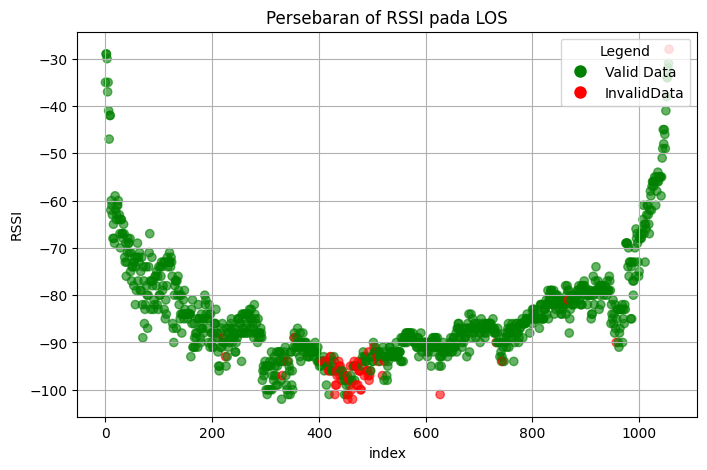

In [12]:
import matplotlib.pyplot as plt

# Plot

def scatterPlot(title, x, xlabel, y, ylabel, kolom):
  plt.figure(figsize=(8, 5))
  # Map warna berdasarkan nilai isNoise
  colors = {True: 'red', False: 'green'}

  # Scatter plot dengan index data di sumbu x
  plt.scatter(x, y, c=kolom.map(colors), alpha=0.6)

  # Menambahkan label dan judul
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

  # Menambahkan legenda
  handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Valid Data'),
            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='InvalidData')]
  plt.legend(handles=handles, title='Legend', loc='upper right')

  # Menambahkan grid dan menampilkan plot
  plt.grid(True)
  plt.show()

scatterPlot("Persebaran of RSSI pada LOS", df.index, 'index', df['RSSI'], "RSSI", df['isNoise'])


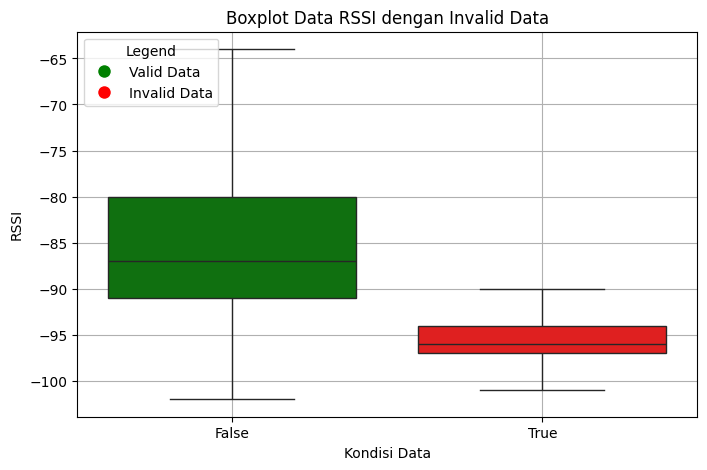

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Plot boxplot dengan hue untuk menentukan warna berdasarkan isNoise
def boxPlotBoolean(title, x, xlabel, y, ylabel, data, kolom):

  plt.figure(figsize=(8, 5))
  sns.boxplot(x=x, y=y, data=data, hue=kolom, palette={True: 'red', False: 'green'}, showfliers=False)

  # Menambahkan label dan judul
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

  # Menambahkan legenda manual
  handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Valid Data'),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Invalid Data')]

  # Menampilkan legenda di pojok kiri atas
  plt.legend(handles=handles, title='Legend', loc='upper left')

  # Menambahkan grid dan menampilkan plot
  plt.grid(True)
  plt.show()

boxPlotBoolean("Boxplot Data RSSI dengan Invalid Data", "isNoise","Kondisi Data", "RSSI", "RSSI", df, "isNoise")


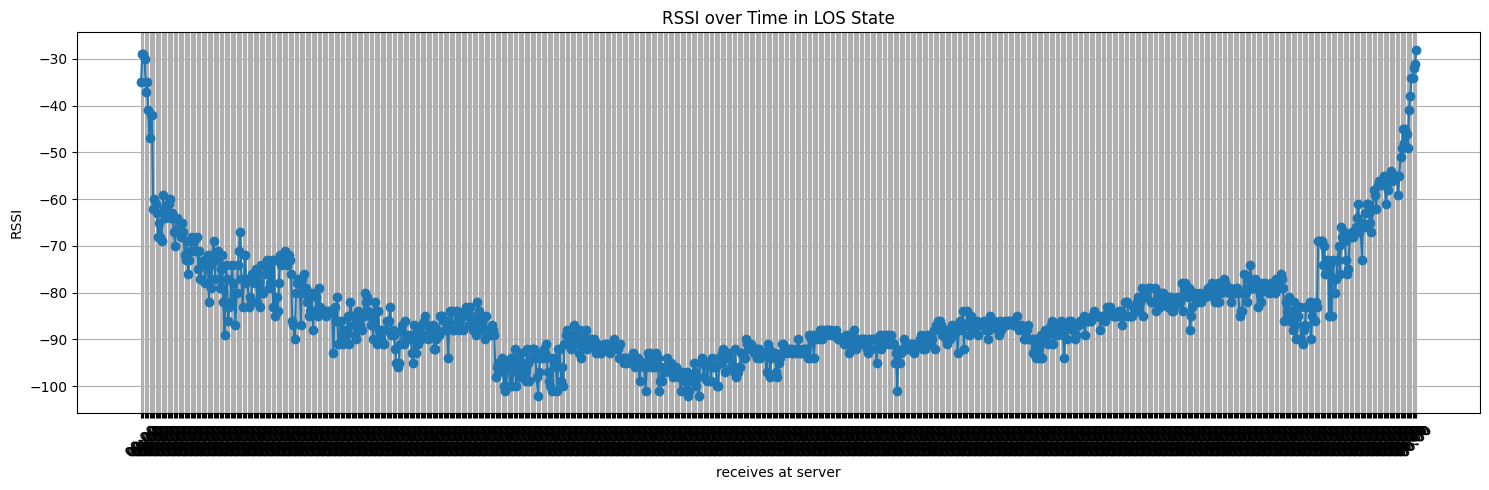

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# PlotbyTime
def plotByTime(title, x, xlabel, y, ylabel):
  plt.figure(figsize=(15, 5))
  plt.plot(x, y, marker='o', linestyle='-')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid(True)
  # Atur format dan rentang sumbu x agar awal & akhir data terlihat
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
  # plt.gca().set_xlim(df_8_mei['received_at_server'].min(), df_8_mei['received_at_server'].max())
  # plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

plotByTime("RSSI over Time in LOS State", df['received_at_server'], "receives at server", df["RSSI"], "RSSI")

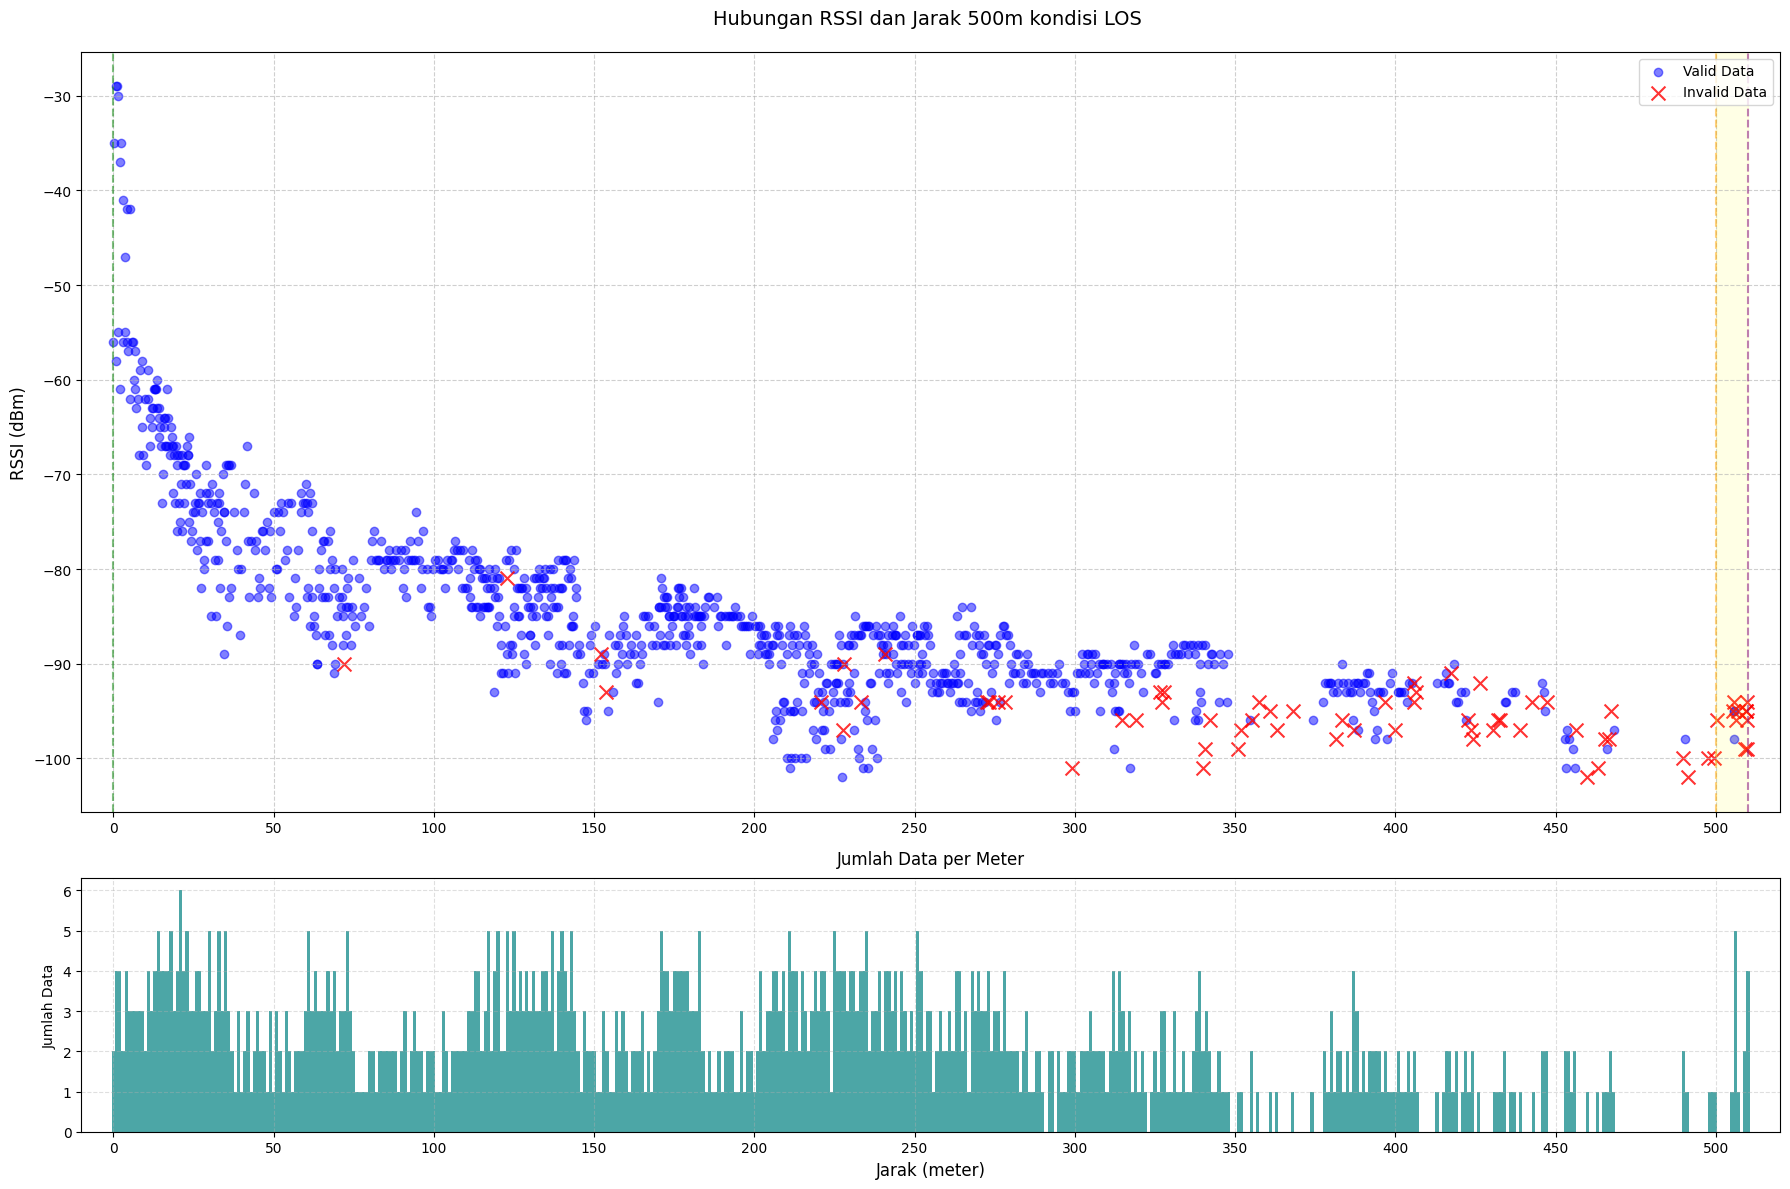

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time
import numpy as np

# Assuming df contains your data with 'received_at_server', 'RSSI', and 'isNoise' columns
# Convert to datetime if not already
df['received_at_server'] = pd.to_datetime(df['received_at_server'])

def waktu_ke_jarak(waktu):
    # Timeline based on your specifications
    timeline = [
        {'time': time(6,47,45), 'jarak': 0, 'keterangan': 'start 0m'},
        {'time': time(7,19,0), 'jarak': 500, 'keterangan': 'start random walk'},
        {'time': time(7,25,0), 'jarak': 510, 'keterangan': 'end random walk'},
        {'time': time(7,25,0), 'jarak': 510, 'keterangan': 'start kembali ke 0m'},
        {'time': time(7,54,0), 'jarak': 0, 'keterangan': 'finish at 0m'}
    ]
    
    waktu = waktu.time()
    
    # Handle times outside measurement period
    if waktu < timeline[0]['time'] or waktu > timeline[-1]['time']:
        return None
    
    # Find the relevant time segment
    for i in range(len(timeline)-1):
        t1, t2 = timeline[i]['time'], timeline[i+1]['time']
        if t1 <= waktu <= t2:
            j1, j2 = timeline[i]['jarak'], timeline[i+1]['jarak']
            keterangan = timeline[i]['keterangan']
            
            # Random walk period (500-510m)
            if 'random walk' in keterangan:
                # Linear approximation for random walk
                durasi = (t2.hour*3600 + t2.minute*60 + t2.second) - (t1.hour*3600 + t1.minute*60 + t1.second)
                progress = ((waktu.hour*3600 + waktu.minute*60 + waktu.second) - 
                          (t1.hour*3600 + t1.minute*60 + t1.second)) / durasi
                return 500 + progress * 10  # 500 to 510m
            
            # Return journey (510m to 0m)
            if 'kembali' in keterangan:
                durasi = (t2.hour*3600 + t2.minute*60 + t2.second) - (t1.hour*3600 + t1.minute*60 + t1.second)
                progress = ((waktu.hour*3600 + waktu.minute*60 + waktu.second) - 
                          (t1.hour*3600 + t1.minute*60 + t1.second)) / durasi
                return j1 - progress * (j1 - j2)
            
            # Initial journey (0m to 500m)
            durasi = (t2.hour*3600 + t2.minute*60 + t2.second) - (t1.hour*3600 + t1.minute*60 + t1.second)
            progress = ((waktu.hour*3600 + waktu.minute*60 + waktu.second) - 
                      (t1.hour*3600 + t1.minute*60 + t1.second)) / durasi
            return j1 + progress * (j2 - j1)
    
    return None

# Add distance column (rounded to nearest meter)
df['jarak'] = df['received_at_server'].apply(waktu_ke_jarak)
df['jarak_rounded'] = df['jarak'].round().astype('Int64')

# Filter data within the measurement period
df_plot = df[(df['received_at_server'].dt.time >= time(6,47,0)) & 
             (df['received_at_server'].dt.time <= time(7,54,0))]

# Count data points per meter
count_per_meter = df_plot.groupby('jarak_rounded').size().reset_index(name='count')

# Separate normal data and noise
df_normal = df_plot[~df_plot['isNoise']]
df_noise = df_plot[df_plot['isNoise']]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), gridspec_kw={'height_ratios': [3, 1]})

# Plot 1: RSSI vs Distance
scatter_normal = ax1.scatter(df_normal['jarak'], df_normal['RSSI'], alpha=0.5, 
                            color='blue', label='Valid Data')
scatter_noise = ax1.scatter(df_noise['jarak'], df_noise['RSSI'], alpha=0.8, 
                           color='red', marker='x', s=100, label='Invalid Data')

ax1.set_title('Hubungan RSSI dan Jarak 500m kondisi LOS ', 
              pad=20, fontsize=14)
ax1.set_ylabel('RSSI (dBm)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Add vertical lines and annotations
ax1.axvline(x=0, color='green', linestyle='--', alpha=0.5)
ax1.axvline(x=500, color='orange', linestyle='--', alpha=0.5)
ax1.axvline(x=510, color='purple', linestyle='--', alpha=0.5)
ax1.axvspan(500, 510, color='yellow', alpha=0.1)

# Set x-axis ticks every 50m
ax1.set_xticks(np.arange(0, 511, 50))
ax1.set_xlim(-10, 520)
ax1.legend(loc='upper right')

# Plot 2: Data Count per Meter
ax2.bar(count_per_meter['jarak_rounded'], count_per_meter['count'], 
       width=1, alpha=0.7, color='teal')
ax2.set_title('Jumlah Data per Meter', pad=10, fontsize=12)
ax2.set_xlabel('Jarak (meter)', fontsize=12)
ax2.set_ylabel('Jumlah Data', fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.4)
ax2.set_xticks(np.arange(0, 511, 50))
ax2.set_xlim(-10, 520)

plt.tight_layout()
plt.show()

In [25]:
df_plot.head(10)

,received_at_server,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,frequency,packet_id,isNoise,jarak,jarak_rounded
0,2025-05-25 06:47:46,08:D1:F9:35:B5:48,2025-05-25 06:47:40,2025-05-25 06:47:45,2025-05-25 06:47:45.831,-35,mqtt,nan,1,False,0.266667,0
1,2025-05-25 06:47:48,08:D1:F9:35:B5:48,2025-05-25 06:47:45,2025-05-25 06:47:47,2025-05-25 06:47:47.460,-29,mqtt,nan,2,False,0.800000,1
2,2025-05-25 06:47:49,08:D1:F9:35:B5:48,2025-05-25 06:47:46,2025-05-25 06:47:48,2025-05-25 06:47:48.071,-29,mqtt,nan,3,False,1.066667,1
3,2025-05-25 06:47:51,08:D1:F9:35:B5:48,2025-05-25 06:47:48,2025-05-25 06:47:50,2025-05-25 06:47:50.675,-30,mqtt,nan,4,False,1.600000,2
4,2025-05-25 06:47:53,08:D1:F9:35:B5:48,2025-05-25 06:47:49,2025-05-25 06:47:51,2025-05-25 06:47:51.279,-37,mqtt,nan,5,False,2.133333,2
5,2025-05-25 06:47:54,08:D1:F9:35:B5:48,2025-05-25 06:47:51,2025-05-25 06:47:53,2025-05-25 06:47:53.910,-35,mqtt,nan,6,False,2.400000,2
6,2025-05-25 06:47:56,08:D1:F9:35:B5:48,2025-05-25 06:47:53,2025-05-25 06:47:55,2025-05-25 06:47:55.516,-41,mqtt,nan,7,False,2.933333,3
7,2025-05-25 06:47:59,08:D1:F9:35:B5:48,2025-05-25 06:47:56,2025-05-25 06:47:58,2025-05-25 06:47:58.747,-47,mqtt,nan,9,False,3.733333,4
8,2025-05-25 06:48:01,08:D1:F9:35:B5:48,2025-05-25 06:47:57,2025-05-25 06:47:59,2025-05-25 06:47:59.353,-42,mqtt,nan,10,False,4.266667,4
9,2025-05-25 06:48:04,08:D1:F9:35:B5:48,2025-05-25 06:48:01,2025-05-25 06:48:03,2025-05-25 06:48:03.590,-42,mqtt,nan,12,False,5.066667,5


In [28]:
import csv
nama_file = 'data_jarak_LOS_rssi.csv'

# Simpan ke CSV
with open(nama_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["jarak (m)" , "rssi (dBm)"])  # header
    for j, r in zip(df_plot['jarak'], df_plot['RSSI']):
        writer.writerow([j, r])

print(f"Data telah disimpan ke file: {nama_file}")

Data telah disimpan ke file: data_jarak_LOS_rssi.csv


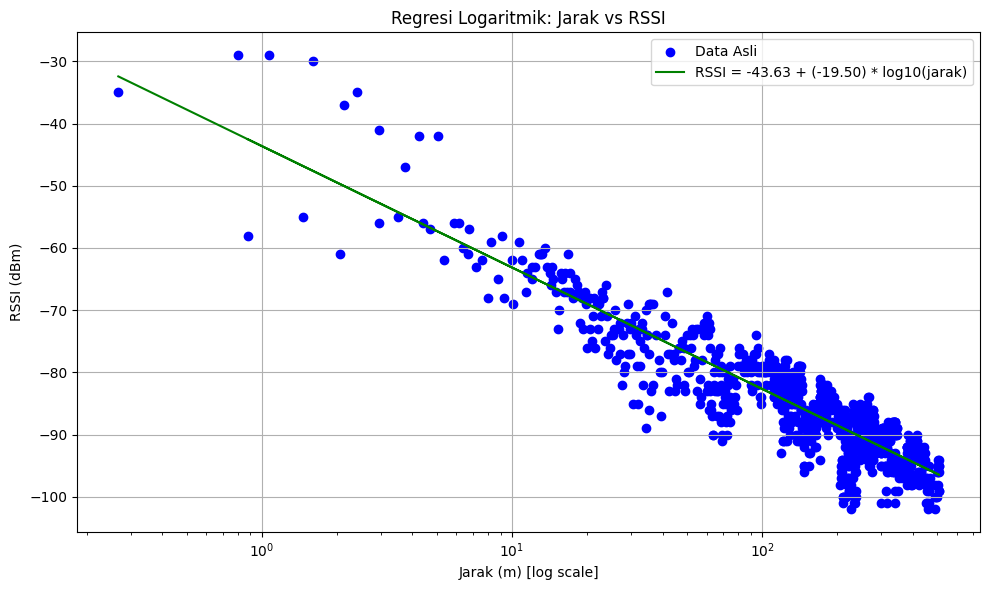

Persamaan regresi: RSSI = -43.63 + (-19.50) * log10(jarak)
Koefisien determinasi (R^2): 0.8312


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Baca data dari CSV
df = pd.read_csv("data_jarak_LOS_rssi.csv")

# Bersihkan data: buang jarak <= 0
df_clean = df[df["jarak (m)"] > 0]

# Ambil data
x = df_clean["jarak (m)"].values
y = df_clean["rssi (dBm)"].values

# Transformasi logaritmik
log_x = np.log10(x)

# Regresi linear
slope, intercept, r_value, p_value, std_err = linregress(log_x, y)

# Prediksi
y_pred = intercept + slope * log_x

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Asli', color='blue')
plt.plot(x, y_pred, label=f'RSSI = {intercept:.2f} + ({slope:.2f}) * log10(jarak)', color='green')
plt.xscale('log')
plt.xlabel("Jarak (m) [log scale]")
plt.ylabel("RSSI (dBm)")
plt.title("Regresi Logaritmik: Jarak vs RSSI")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tampilkan hasil regresi
print(f"Persamaan regresi: RSSI = {intercept:.2f} + ({slope:.2f}) * log10(jarak)")
print(f"Koefisien determinasi (R^2): {r_value**2:.4f}")


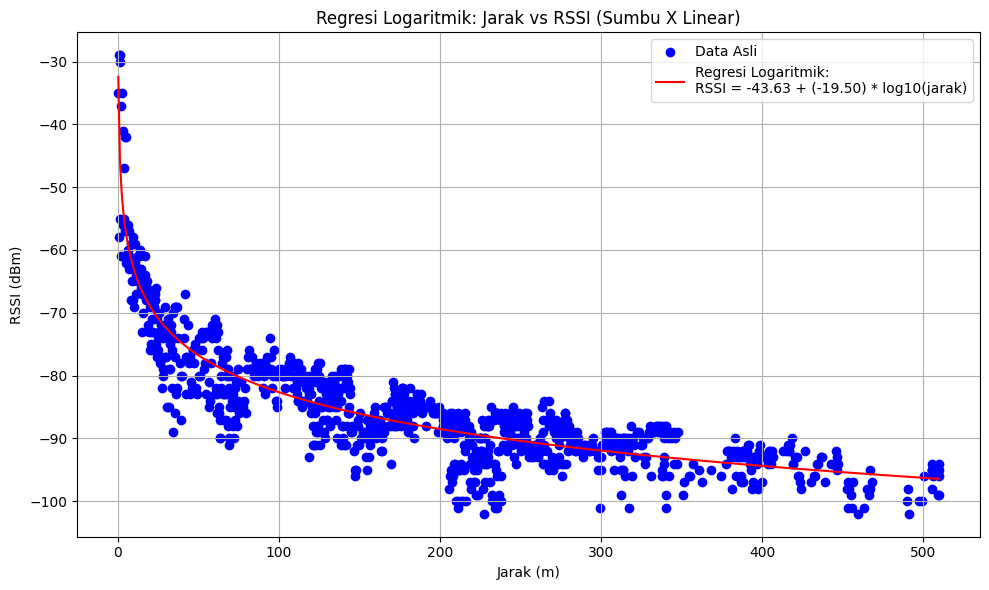

In [ ]:
# Ambil data
x = df_clean["jarak (m)"].values
y = df_clean["rssi (dBm)"].values

# Regresi logaritmik
log_x = np.log10(x)
slope, intercept, r_value, p_value, std_err = linregress(log_x, y)

# Buat jarak baru untuk kurva regresi (smooth)
x_line = np.linspace(min(x), max(x), 500)
y_line = intercept + slope * np.log10(x_line)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Asli', color='blue')
plt.plot(x_line, y_line, label=f'Regresi Logaritmik:\nRSSI = {intercept:.2f} + ({slope:.2f}) * log10(jarak)', color='red')
plt.xlabel("Jarak (m)")
plt.ylabel("RSSI (dBm)")
plt.title("Hubungan: Jarak vs RSSI (Sumbu X Linear)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# Create a new DataFrame with average RSSI and count per meter
df_per_meter = df_plot.groupby('jarak_rounded').agg(
    avg_RSSI=('RSSI', 'mean'),
    data_count=('RSSI', 'count'),
    noise_count=('isNoise', 'sum')
).reset_index()

# Rename columns for clarity
df_per_meter = df_per_meter.rename(columns={
    'jarak_rounded': 'jarak_meter',
    'avg_RSSI': 'rata_rssi',
    'data_count': 'jumlah_data',
    'noise_count': 'jumlah_invalid_data'
})

# Calculate percentage of noise
df_per_meter['persentase_invalid_data'] = (df_per_meter['jumlah_invalid_data'] / df_per_meter['jumlah_data']) * 100

# Round the average RSSI to 2 decimal places
df_per_meter['rata_rssi'] = df_per_meter['rata_rssi'].round(2)
df_per_meter['persentase_invalid_data'] = df_per_meter['persentase_invalid_data'].round(2)

# Add distance category column
df_per_meter['kategori'] = pd.cut(df_per_meter['jarak_meter'],
                                 bins=[-1, 0, 500, 510, 520],
                                 labels=['Start/Finish', 'Main Route', 'Random Walk', 'Beyond'])

# Display the first 10 rows
print(df_per_meter.head(10))

# Display summary statistics
print("\nSummary Statistics:")
print(df_per_meter.describe())

# Save to CSV if needed
df_per_meter.to_csv('rssi_per_meter.csv', index=False)

   jarak_meter  rata_rssi  jumlah_data  jumlah_invalid_data  \
0            0     -45.50            2                    0   
1            1     -42.75            4                    0   
2            2     -40.75            4                    0   
3            3     -48.50            2                    0   
4            4     -50.00            4                    0   
5            5     -53.67            3                    0   
6            6     -57.33            3                    0   
7            7     -60.33            3                    0   
8            8     -63.00            3                    0   
9            9     -63.67            3                    0   

   persentase_invalid_data      kategori  
0                      0.0  Start/Finish  
1                      0.0    Main Route  
2                      0.0    Main Route  
3                      0.0    Main Route  
4                      0.0    Main Route  
5                      0.0    Main Route  
6    


Stats by Distance Category:
             rata_rssi           jumlah_data persentase_invalid_data
                  mean       std         sum                    mean
kategori                                                            
Start/Finish  -45.5000       NaN           2                 0.00000
Main Route    -86.3758  8.789286        1020                 9.01747
Random Walk   -95.7200  0.831865          13                88.00000
Beyond             NaN       NaN           0                     NaN

Meters with High Noise (>20%):
     jarak_meter  rata_rssi  jumlah_data  jumlah_invalid_data  \
424          510     -96.00            4                    4   
397          433     -96.00            1                    1   
401          439     -97.00            1                    1   
349          357     -94.00            1                    1   
350          361     -95.00            1                    1   
351          363     -97.00            1                    1   
3

C:\Users\ASUS\AppData\Local\Temp\ipykernel_116780\2857862124.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_stats = df_per_meter.groupby('kategori').agg({


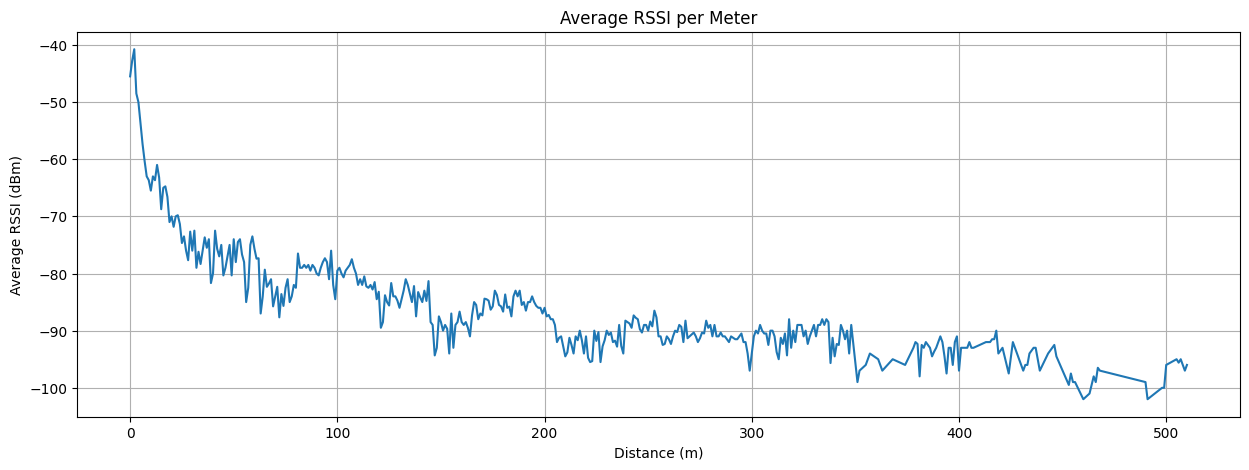

In [33]:
# 1. Analyze by distance category
category_stats = df_per_meter.groupby('kategori').agg({
    'rata_rssi': ['mean', 'std'],
    'jumlah_data': 'sum',
    'persentase_invalid_data': 'mean'
})
print("\nStats by Distance Category:")
print(category_stats)

# 2. Find meters with highest noise
high_noise = df_per_meter[df_per_meter['persentase_invalid_data'] > 20].sort_values('persentase_invalid_data', ascending=False)
print("\nMeters with High Noise (>20%):")
print(high_noise)

# 3. Plot average RSSI trend
plt.figure(figsize=(15, 5))
plt.plot(df_per_meter['jarak_meter'], df_per_meter['rata_rssi'])
plt.title('Average RSSI per Meter')
plt.xlabel('Distance (m)')
plt.ylabel('Average RSSI (dBm)')
plt.grid(True)
plt.show()

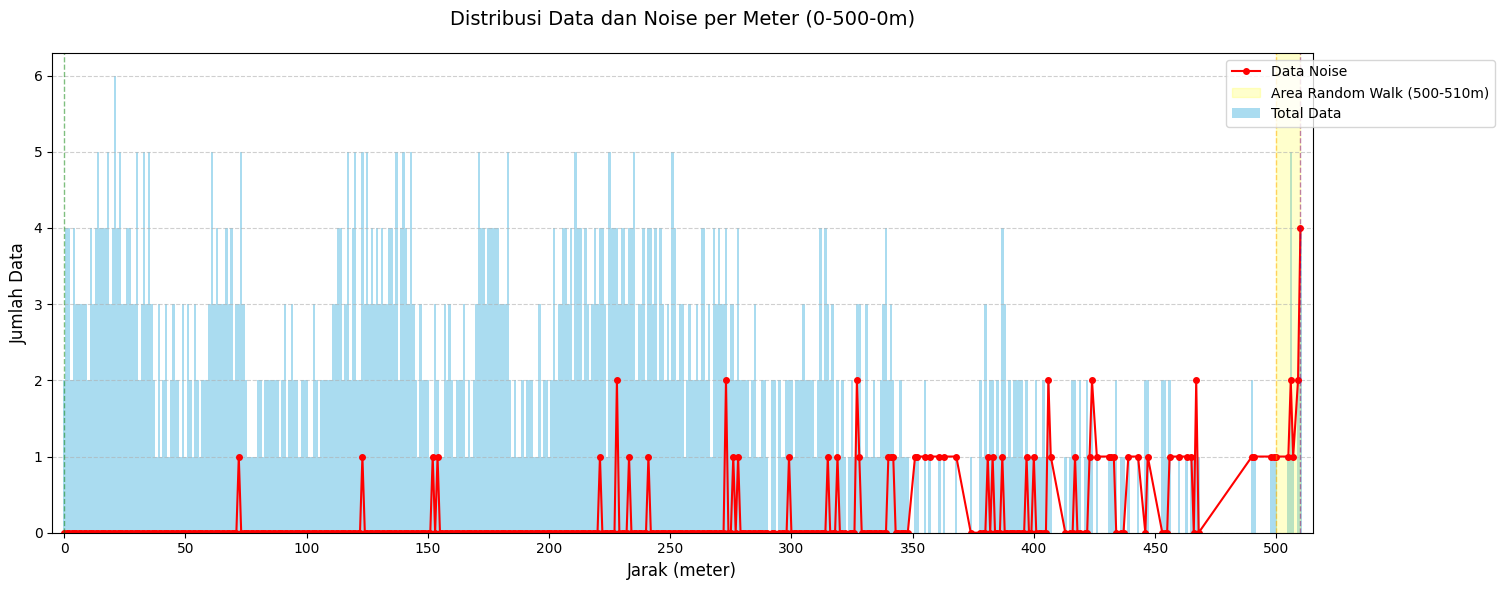

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot jumlah data per meter
plt.figure(figsize=(15, 6))

# Buat bar plot untuk jumlah data
bar_plot = plt.bar(df_per_meter['jarak_meter'], 
                   df_per_meter['jumlah_data'], 
                   color='skyblue', 
                   width=1, 
                   alpha=0.7,
                   label='Total Data')

# Buat line plot untuk jumlah noise
line_plot = plt.plot(df_per_meter['jarak_meter'], 
                    df_per_meter['jumlah_invalid_data'], 
                    color='red', 
                    marker='o',
                    markersize=4,
                    linewidth=1.5,
                    label='Data Noise')

# Highlight area random walk
plt.axvspan(500, 510, color='yellow', alpha=0.2, label='Area Random Walk (500-510m)')

# Tambahkan garis untuk titik penting
plt.axvline(x=0, color='green', linestyle='--', alpha=0.5, linewidth=1)
plt.axvline(x=500, color='orange', linestyle='--', alpha=0.5, linewidth=1)
plt.axvline(x=510, color='purple', linestyle='--', alpha=0.5, linewidth=1)

# Konfigurasi plot
plt.title('Distribusi Data dan Noise per Meter (0-500-0m)', pad=20, fontsize=14)
plt.xlabel('Jarak (meter)', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Atur x-axis
plt.xticks(np.arange(0, max(df_per_meter['jarak_meter'])+10, 50))
plt.xlim(-5, 515)

# Tambahkan legenda
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Tampilkan plot
plt.tight_layout()
plt.show()

In [37]:
import numpy as np
import math
from scipy.stats import norm

# Fungsi untuk menghitung persentase sampling - TELAH DIPERBAIKI
def calculate_sampling_percentage(d):
    percentage = (-43.63 - 19.50 * math.log10(d if d > 0 else 0.1) + 96.26) / 52.63 * 100
    return max(6, min(100, percentage))

# Fungsi model path loss
def path_loss_model(distance):
    return -43.63 + (-19.50) * math.log10(distance if distance > 0 else 0.1)

# Generate data baru untuk setiap meter
new_data = []
for meter in range(0, 511):  # 0-510 meter
    # Hitung jumlah data yang akan digenerate
    existing_count = len(df_plot[df_plot['jarak_rounded'] == meter])
    sampling_percentage = calculate_sampling_percentage(meter)
    new_count = int(existing_count * sampling_percentage / 100)
    
    # Generate data RSSI dengan variasi acak
    for _ in range(new_count):
        # Nilai RSSI berdasarkan model dengan noise acak
        rssi_mean = path_loss_model(meter)
        rssi_value = rssi_mean + norm.rvs(scale=3)  # Tambahkan noise dengan std dev 3dB
        
        # Buat timestamp acak dalam rentang waktu pengukuran
        time_range = (df_plot['received_at_server'].max() - df_plot['received_at_server'].min()).total_seconds()
        random_seconds = np.random.uniform(0, time_range)
        new_time = df_plot['received_at_server'].min() + pd.Timedelta(seconds=random_seconds)
        
        # Tambahkan ke list data baru
        new_data.append({
            'received_at_server': new_time,
            'RSSI': rssi_value,
            'isNoise': False,  # Data generated dianggap bukan noise
            'jarak': meter + np.random.uniform(-0.5, 0.5),  # Tambahkan variasi kecil pada jarak
            'jarak_rounded': meter
        })

# Buat dataframe dari data baru
df_generated = pd.DataFrame(new_data)

# Gabungkan dengan data asli
df_combined = pd.concat([df_plot, df_generated], ignore_index=True)

# Urutkan berdasarkan waktu
df_combined.sort_values('received_at_server', inplace=True)

In [40]:
df_generated

,received_at_server,RSSI,isNoise,jarak,jarak_rounded
0,2025-05-25 07:15:18.628299239,-22.829652,False,0.112418,0
1,2025-05-25 07:00:11.383138504,-21.997054,False,0.335419,0
2,2025-05-25 06:56:53.636331916,-41.556493,False,1.388852,1
3,2025-05-25 06:48:39.771894180,-40.648871,False,0.597818,1
4,2025-05-25 07:24:37.246973354,-40.897815,False,1.460504,1
...,...,...,...,...,...
77,2025-05-25 07:15:06.388732001,-86.042432,False,122.807129,123
78,2025-05-25 06:55:41.868883063,-83.886309,False,124.908931,125
79,2025-05-25 07:39:58.421875562,-81.961070,False,137.440996,137
80,2025-05-25 07:32:42.243336347,-86.932836,False,140.291178,140


In [44]:
df_combined.sort_values('jarak', inplace=True)
df_combined

,received_at_server,devUI,time_at_device,time_received_at_gateway,time_send_from_gateway,RSSI,protocol,frequency,packet_id,isNoise,jarak,jarak_rounded
1034,2025-05-25 07:54:00.000000000,08:D1:F9:35:B5:48,2025-05-25 07:53:57,2025-05-25 07:53:59,2025-05-25 07:53:59.940,-56.000000,mqtt,nan,2460,False,0.000000,0
1035,2025-05-25 07:15:18.628299239,NaN,NaN,NaT,NaN,-22.829652,NaN,NaN,NaN,False,0.112418,0
0,2025-05-25 06:47:46.000000000,08:D1:F9:35:B5:48,2025-05-25 06:47:40,2025-05-25 06:47:45,2025-05-25 06:47:45.831,-35.000000,mqtt,nan,1,False,0.266667,0
1036,2025-05-25 07:00:11.383138504,NaN,NaN,NaT,NaN,-21.997054,NaN,NaN,NaN,False,0.335419,0
1038,2025-05-25 06:48:39.771894180,NaN,NaN,NaT,NaN,-40.648871,NaN,NaN,NaN,False,0.597818,1
...,...,...,...,...,...,...,...,...,...,...,...,...
471,2025-05-25 07:24:41.000000000,08:D12�9:35:B5:48,,2025-05-25 07:24:40,2025-05-25 07:24:40.465,-95.000000,mqtt,nan,�;�3,True,509.472222,509
472,2025-05-25 07:24:43.000000000,,,2025-05-25 07:24:41,2025-05-25 07:24:41.074,-95.000000,mqtt,nan,1374,True,509.527778,510
473,2025-05-25 07:24:44.000000000,,,2025-05-25 07:24:43,2025-05-25 07:24:43.712,-99.000000,mqtt,,,True,509.555556,510
474,2025-05-25 07:24:51.000000000,08:D1:F9:35:B5:48,,2025-05-25 07:24:49,2025-05-25 07:24:49.166,-94.000000,mqtt,nan,1379,True,509.750000,510


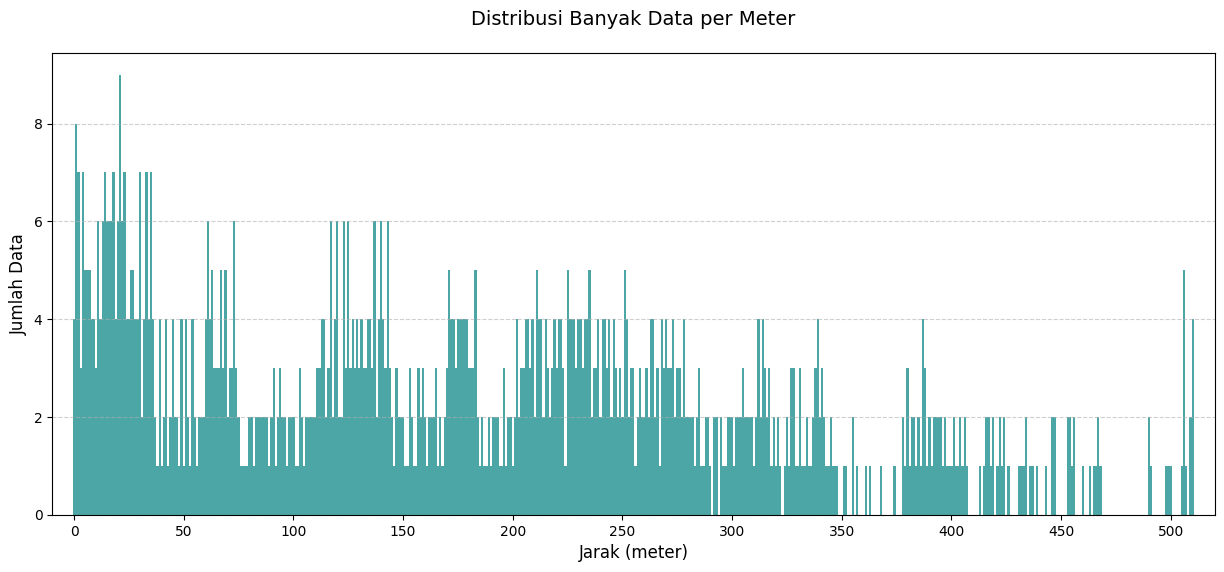

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah data per meter
count_per_meter = df_combined.groupby('jarak_rounded').size().reset_index(name='count')

# Plot
plt.figure(figsize=(15, 6))
plt.bar(count_per_meter['jarak_rounded'], count_per_meter['count'], 
        width=1, alpha=0.7, color='teal')
plt.title('Distribusi Banyak Data per Meter', fontsize=14, pad=20)
plt.xlabel('Jarak (meter)', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(np.arange(0, 520, 50))  # Interval 50m
plt.xlim(-10, 520)
plt.show()

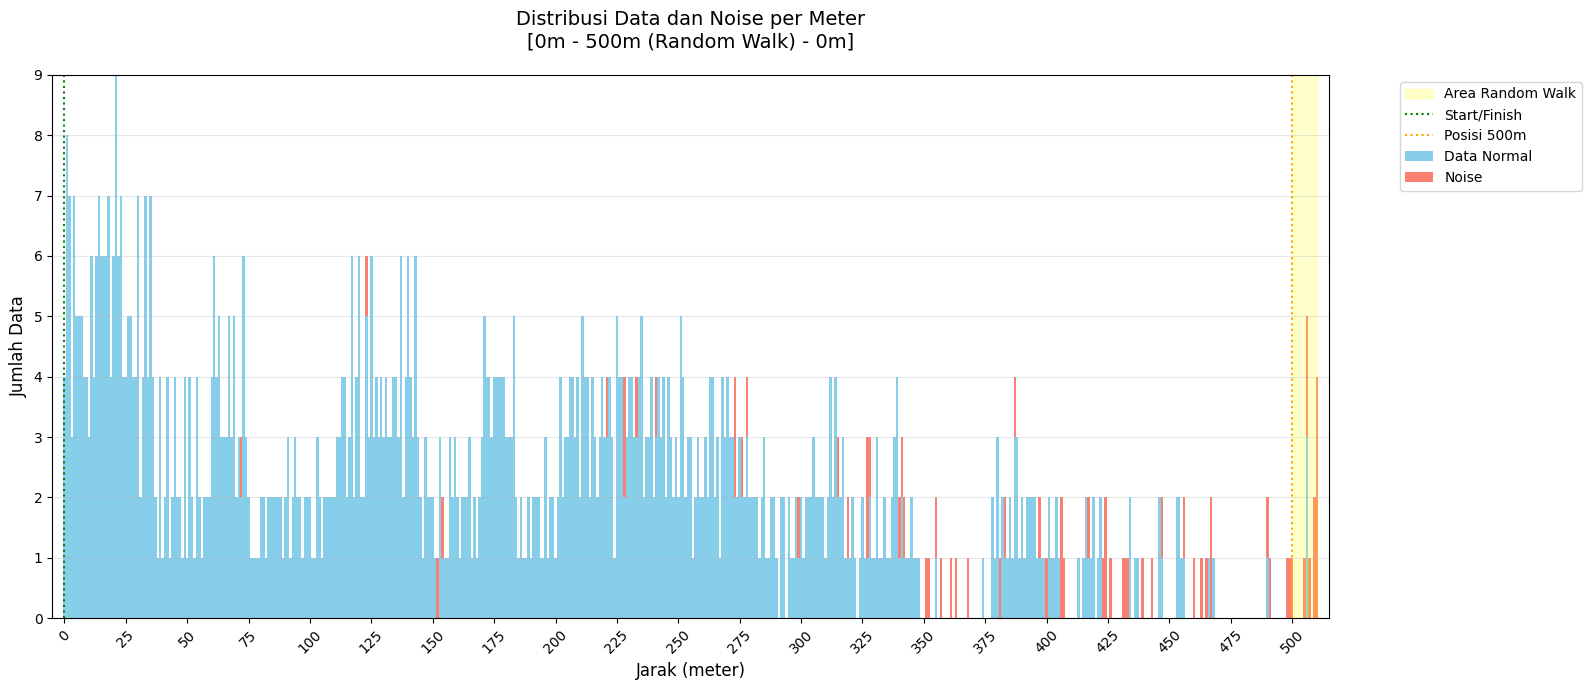

In [46]:
plt.figure(figsize=(16, 7))

# Hitung jumlah normal dan noise
count_data = df_combined.groupby('jarak_rounded').agg(
    total=('RSSI', 'count'),
    noise=('isNoise', 'sum')
).reset_index()

# Plot stacked bar
plt.bar(count_data['jarak_rounded'], count_data['total'] - count_data['noise'], 
        width=1, label='Data Normal', color='skyblue')
plt.bar(count_data['jarak_rounded'], count_data['noise'], 
        width=1, label='Noise', color='salmon',
        bottom=count_data['total'] - count_data['noise'])

# Anotasi khusus untuk area random walk
plt.axvspan(500, 510, color='yellow', alpha=0.2, label='Area Random Walk')

# Garis penting
plt.axvline(x=0, color='green', linestyle=':', label='Start/Finish')
plt.axvline(x=500, color='orange', linestyle=':', label='Posisi 500m')

plt.title('Distribusi Data dan Noise per Meter\n[0m - 500m (Random Walk) - 0m]', fontsize=14, pad=20)
plt.xlabel('Jarak (meter)', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(np.arange(0, 520, 25), rotation=45)  # Interval 25m
plt.xlim(-5, 515)
plt.grid(axis='y', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

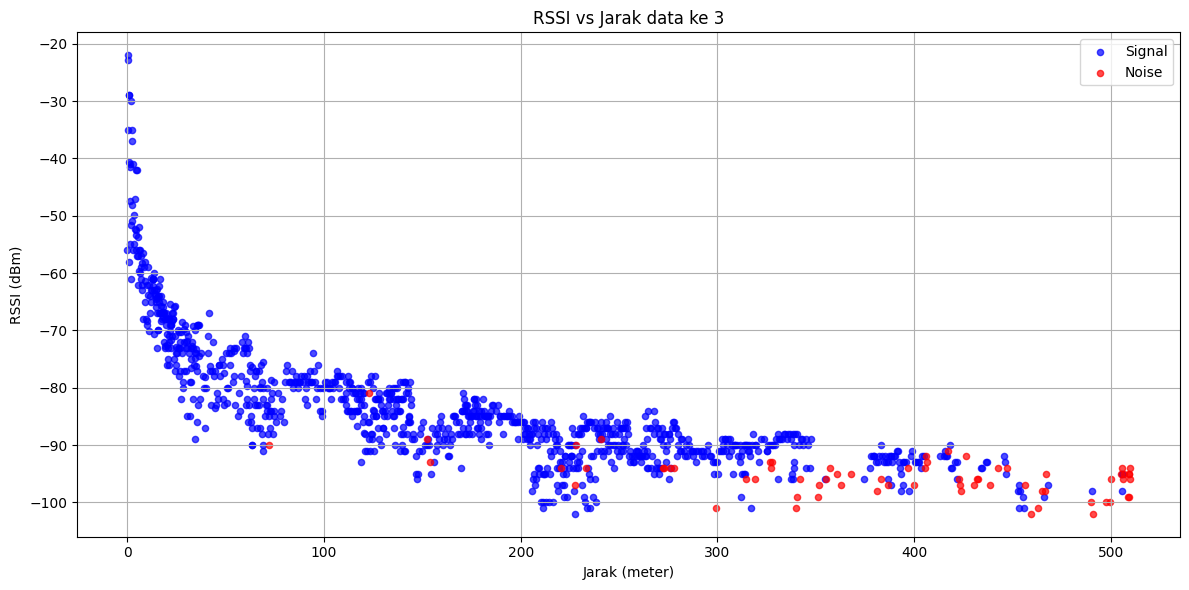

In [54]:
import matplotlib.pyplot as plt

# Pisahkan data berdasarkan isNoise
df_noise = df_combined[df_combined['isNoise'] == True]
df_signal = df_combined[df_combined['isNoise'] == False]

# Buat figure dan axis
plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(df_signal['jarak'], df_signal['RSSI'], color='blue', label='Signal', alpha=0.7, s=20)
plt.scatter(df_noise['jarak'], df_noise['RSSI'], color='red', label='Noise', alpha=0.7, s=20)

# Tambahkan judul dan label
plt.title('RSSI vs Jarak data ke 3')
plt.xlabel('Jarak (meter)')
plt.ylabel('RSSI (dBm)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


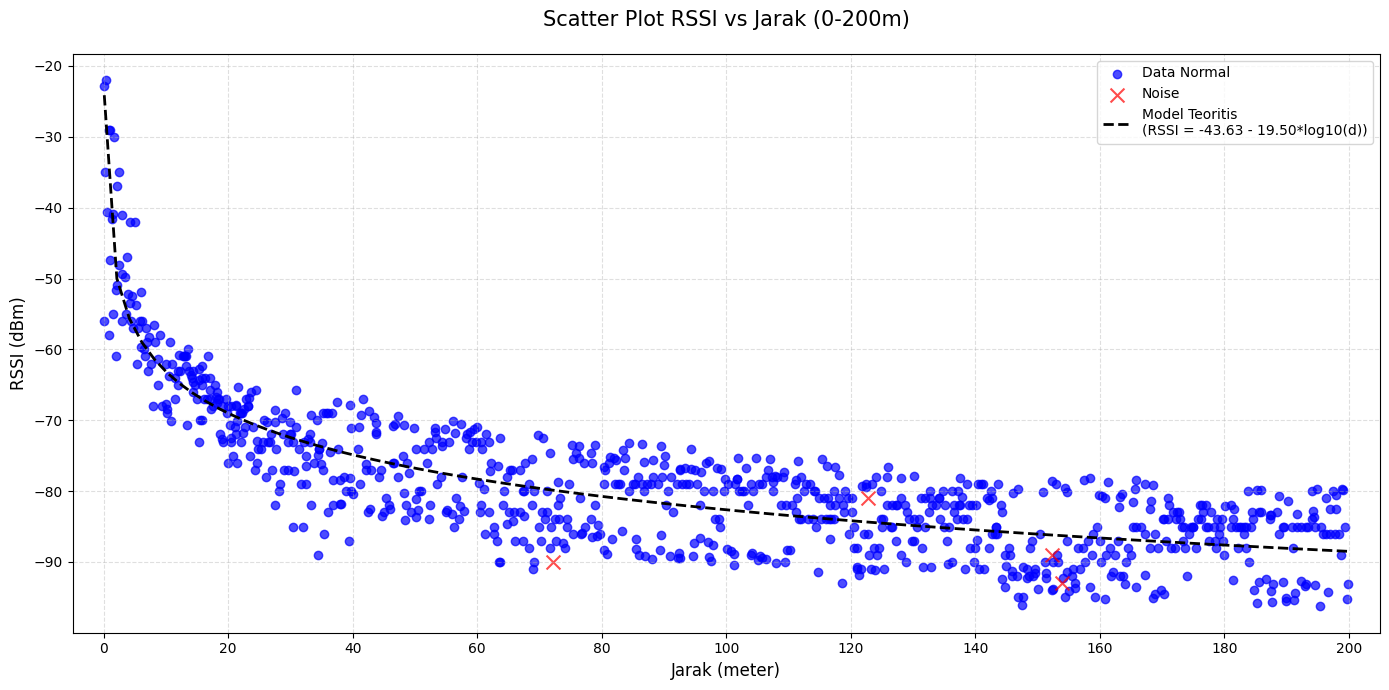

In [64]:
import numpy as np
import math
from scipy.stats import norm

# Fungsi untuk generate RSSI dengan error 5-10%
def generate_rssi(distance):
    if distance <= 0:
        distance = 0.1  # Avoid log(0)
    theoretical = -43.63 - 19.50 * math.log10(distance)
    error_percent = np.random.uniform(5, 10)
    error = theoretical * error_percent / 100
    return theoretical + np.random.choice([-1, 1]) * error

# Generate data baru untuk range 0-200m
new_data = []
for meter in range(0, 201):
    # Hitung data yang sudah ada
    existing_data = df_combined[(df_combined['jarak_rounded'] == meter) & 
                               (df_combined['jarak'] <= 200)]
    num_existing = len(existing_data)
    
    # Generate data baru jika kurang dari 4
    if num_existing < 4:
        num_needed = 4 - num_existing
        
        for _ in range(num_needed):
            # Buat timestamp acak dalam rentang waktu yang ada
            time_range = (df_combined['received_at_server'].max() - 
                         df_combined['received_at_server'].min()).total_seconds()
            random_seconds = np.random.uniform(0, time_range)
            new_time = df_combined['received_at_server'].min() + pd.Timedelta(seconds=random_seconds)
            
            # Generate RSSI
            rssi_value = generate_rssi(meter)
            
            new_data.append({
                'received_at_server': new_time,
                'RSSI': rssi_value,
                'isNoise': False,
                'jarak': meter + np.random.uniform(-0.5, 0.5),
                'jarak_rounded': meter
            })

# Gabungkan dengan data asli
df_updated = pd.concat([df_combined, pd.DataFrame(new_data)], ignore_index=True)

# Plot hasil
plt.figure(figsize=(14, 7))

# Filter data untuk range 0-200m
plot_data = df_updated[df_updated['jarak'] <= 200]

# Pisahkan data normal dan noise
normal_data = plot_data[plot_data['isNoise'] == False]
noise_data = plot_data[plot_data['isNoise'] == True]

# Plot data
plt.scatter(normal_data['jarak'], normal_data['RSSI'], 
            alpha=0.7, color='blue', label='Data Normal')
plt.scatter(noise_data['jarak'], noise_data['RSSI'], 
            alpha=0.7, color='red', marker='x', s=100, label='Noise')

# Tambahkan model teoritis
distances = np.linspace(0.1, 200, 100)
rssi_theoretical = [-43.63 - 19.50 * math.log10(d) for d in distances]
plt.plot(distances, rssi_theoretical, 'k--', linewidth=2, 
         label='Model Teoritis\n(RSSI = -43.63 - 19.50*log10(d))')

# Konfigurasi plot
plt.title('Scatter Plot RSSI vs Jarak (0-200m)', fontsize=15, pad=20)
plt.xlabel('Jarak (meter)', fontsize=12)
plt.ylabel('RSSI (dBm)', fontsize=12)
plt.xticks(np.arange(0, 201, 20))
plt.xlim(-5, 205)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()

# Tampilkan jumlah data per meter
count_per_meter = df_updated[df_updated['jarak'] <= 200].groupby('jarak_rounded').size()

plt.tight_layout()
plt.show()

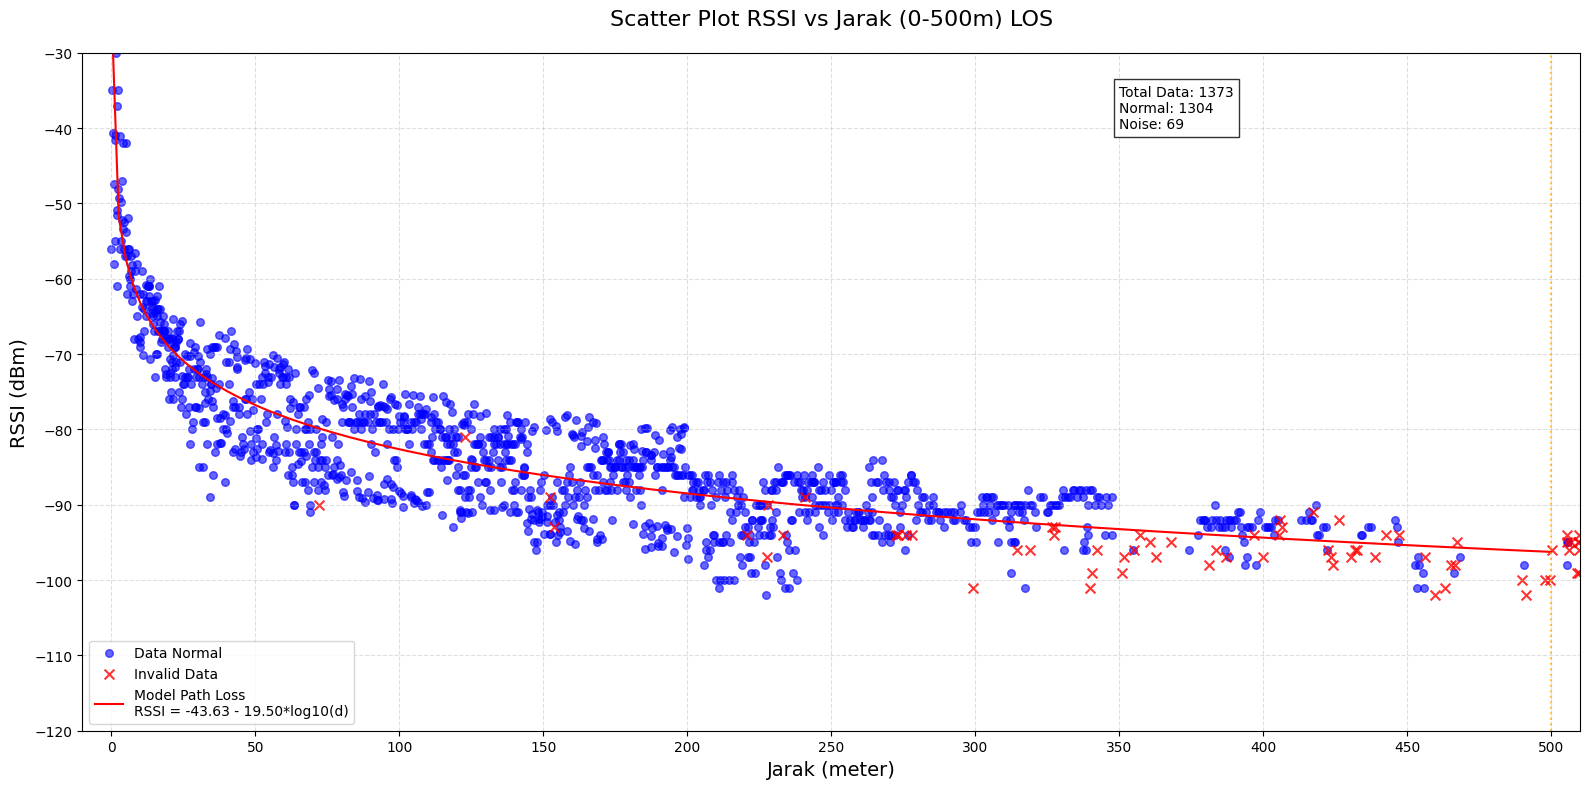

In [65]:
plt.figure(figsize=(16, 8))

# Filter data untuk range 0-500m
plot_data = df_updated

# Pisahkan data normal dan noise
normal_data = plot_data[plot_data['isNoise'] == False]
noise_data = plot_data[plot_data['isNoise'] == True]

# 1. Plot data
plt.scatter(normal_data['jarak'], normal_data['RSSI'], 
            alpha=0.6, color='blue', s=30, label='Data Normal')
plt.scatter(noise_data['jarak'], noise_data['RSSI'], 
            alpha=0.8, color='red', marker='x', s=50, label='Invalid Data')

# 2. Plot model teoritis
distances = np.linspace(0.1, 500, 200)
rssi_theoretical = [-43.63 - 19.50 * math.log10(d) for d in distances]
plt.plot(distances, rssi_theoretical, '-', linewidth=1.5,
         label='Model Path Loss\nRSSI = -43.63 - 19.50*log10(d)', color="red")

# 3. Highlight area penting
plt.axvline(x=500, color='orange', linestyle=':', alpha=0.7, linewidth=1.5)

# 4. Konfigurasi plot
plt.title('Scatter Plot RSSI vs Jarak (0-500m) LOS', fontsize=16, pad=20)
plt.xlabel('Jarak (meter)', fontsize=14)
plt.ylabel('RSSI (dBm)', fontsize=14)
plt.xticks(np.arange(0, 501, 50))
plt.xlim(-10, 510)
plt.ylim(-120, -30)  # Sesuaikan range RSSI jika perlu
plt.grid(True, linestyle='--', alpha=0.4)

# 5. Tambahkan informasi tambahan
plt.legend()
plt.text(350, -40, 
         f'Total Data: {len(plot_data)}\nNormal: {len(normal_data)}\nNoise: {len(noise_data)}',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

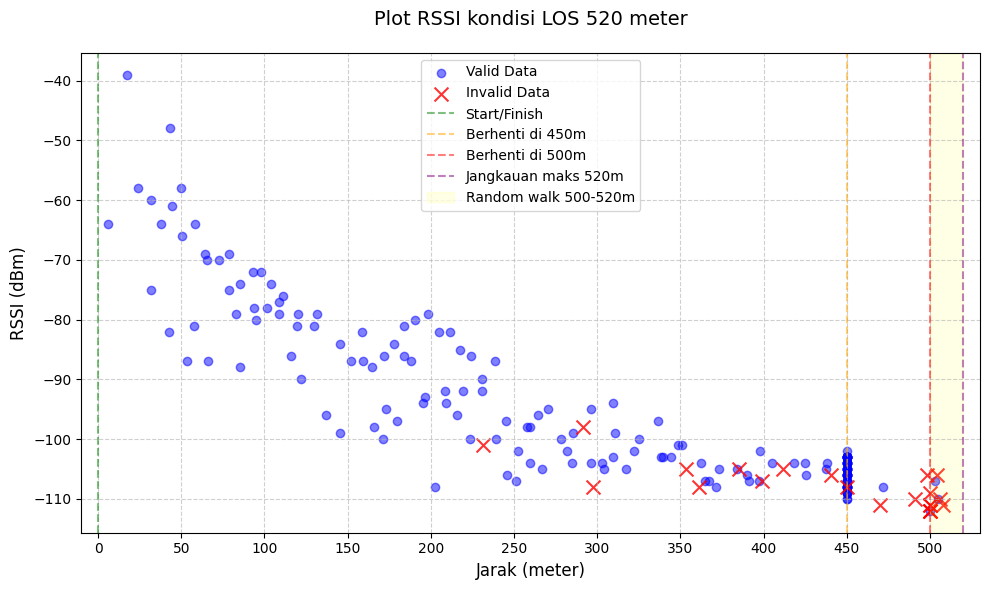

In [ ]:
plt.figure(figsize=(16, 7))

# Hitung jumlah normal dan noise
count_data = df_combined.groupby('jarak_rounded').agg(
    total=('RSSI', 'count'),
    noise=('isNoise', 'sum')
).reset_index()

# Plot stacked bar
plt.bar(count_data['jarak_rounded'], count_data['total'] - count_data['noise'], 
        width=1, label='Data Normal', color='skyblue')
plt.bar(count_data['jarak_rounded'], count_data['noise'], 
        width=1, label='Noise', color='salmon',
        bottom=count_data['total'] - count_data['noise'])

# Anotasi khusus untuk area random walk
plt.axvspan(500, 510, color='yellow', alpha=0.2, label='Area Random Walk')

# Garis penting
plt.axvline(x=0, color='green', linestyle=':', label='Start/Finish')
plt.axvline(x=500, color='orange', linestyle=':', label='Posisi 500m')

plt.title('Distribusi Data dan Noise per Meter\n[0m - 500m (Random Walk) - 0m]', fontsize=14, pad=20)
plt.xlabel('Jarak (meter)', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(np.arange(0, 520, 25), rotation=45)  # Interval 25m
plt.xlim(-5, 515)
plt.grid(axis='y', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

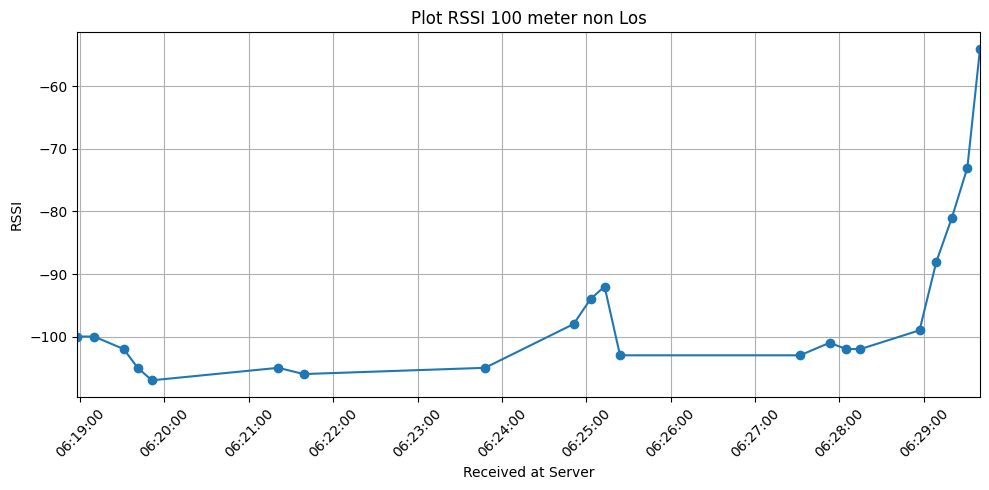

In [31]:
# Filter mulai dari 2025-05-09 16:54
start_time = pd.to_datetime("2025-05-11 06:18:00")
end_time = pd.to_datetime("2025-05-11 06:30:00")

df_non_los2 = df_11[
    (df_11['received_at_server'] >= start_time) &
    (df_11['received_at_server'] <= end_time)
].copy()


# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_non_los2['received_at_server'], df_non_los2['RSSI'], marker='o', linestyle='-')

plt.xlabel('Received at Server')
plt.ylabel('RSSI')
plt.title('Plot RSSI 100 meter non Los')
plt.grid(True)

# Format dan rentang sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().set_xlim(df_non_los2['received_at_server'].min(), df_non_los2['received_at_server'].max())
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
print("non los noise total: ",df_non_los2['isNoise'].value_counts())

non los noise total:  isNoise
False    13
True      8
Name: count, dtype: int64
